In [1]:
#importo il dataset mnist
from tensorflow.keras.datasets import mnist
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

from tensorflow import keras
from tensorflow.keras import layers

#passa attraverso due layer di tipo dense
model = keras.Sequential([layers.Dense(512,activation="relu"), layers.Dense(10,activation="softmax")])

#importante prima di addestrare il modello
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

#rendo i set compatibili per il modello
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

#addestriamo il modello
model.fit(train_images, train_labels, epochs=5, batch_size=128)

2025-09-30 22:34:55.965980: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 22:34:56.164250: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-30 22:35:01.304483: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 22:35:04.048779: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9252 - loss: 0.2626
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9685 - loss: 0.1078
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9791 - loss: 0.0710
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9851 - loss: 0.0507
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9890 - loss: 0.0378


In [12]:
#creiamo nuovo set di test che comprende solo le prime 10 del modello
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

#array che contiene la probabilità rispettiva che il test sia una cifra da 0 a 10 (la più grande è la più probabile)
print(predictions[0])

#valutiamo e stampiamo accuracy e loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_acc", test_acc)
print("test_loss", test_loss)

#confrontiamo prediction e risultato effettivo
for i in range(len(test_digits)):
    print("P",i," ",predictions[i].argmax())
    print("R",i," ",test_labels[i])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[5.4916733e-09 2.0053015e-09 5.3098229e-06 1.4387363e-05 4.0189400e-11
 2.9271499e-09 5.3820343e-13 9.9997908e-01 8.8378540e-09 1.0383618e-06]
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9786 - loss: 0.0680
test_acc 0.978600025177002
test_loss 0.0680147334933281
P 0   7
R 0   7
P 1   2
R 1   2
P 2   1
R 2   1
P 3   0
R 3   0
P 4   4
R 4   4
P 5   1
R 5   1
P 6   4
R 6   4
P 7   9
R 7   9
P 8   5
R 8   5
P 9   9
R 9   9


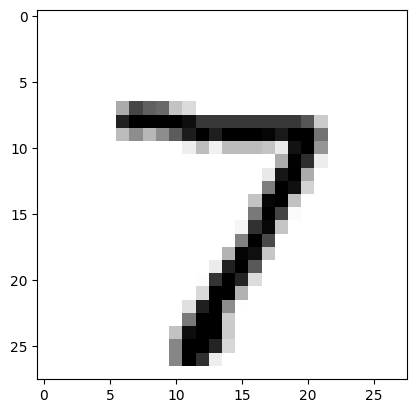

In [16]:
#mostriamo sottoforma di grafico la cifra di test
import matplotlib.pyplot as plt
digit = test_digits[0].reshape((28, 28)) #reshape perchè abbiamo cambiato shape a 28 nel primo blocco di codice
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()